# **Image Classification using CIFAR Dataset**
-The model is built in Keras [a high-level deep learning library built on top of tensorflow].
- The model has a total of 308,394 trainable Parameters.
- If you want to build your own model using this architecture then I    would recommend you to train the model on google colab, if you do not have access to GPU.
- Initially the model was trained only for 40 epochs to test the initial evaluation.
- Then I implemented Data Augmentation to increase the performance.
- For convenience the notebook is divided into two parts.First without Augmentation and then with Agmentation.
- author:m.mahyar.ali --- April 16,2020

In [1]:
#Importing the Required Libraries for building the model in Keras
import keras as K
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dense,Dropout,BatchNormalization
from keras import regularizers
from keras.datasets import cifar10


Using TensorFlow backend.


In [2]:
#Downloading the Dataset
(X_train,y_train),(X_test,y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


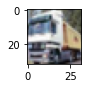

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as img

fig = plt.figure(figsize=(1,1))
ax=fig.add_subplot(1,1,1)
ax.imshow(X_train[1,:,:,:])


In [0]:
#Normalizing
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

In [0]:
#Converting to One-Hot representation
from keras.utils import to_categorical
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

In [0]:
labels =  ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [7]:
#Define the model
model = Sequential()
model.add(Conv2D(32,(3,3),padding='same',activation='relu',kernel_regularizer=regularizers.l2(0.001),input_shape=(32,32,3)))
model.add(BatchNormalization())
model.add(Conv2D(32,(3,3),padding='same',activation='relu',kernel_regularizer=regularizers.l2(0.001)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(64,(3,3),padding='same',activation='relu',kernel_regularizer=regularizers.l2(0.001)))
model.add(BatchNormalization())
model.add(Conv2D(64,(3,3),padding='same',activation='relu',kernel_regularizer=regularizers.l2(0.001)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(128,(3,3),padding='same',activation ='relu',kernel_regularizer=regularizers.l2(0.001)))
model.add(BatchNormalization())
model.add(Conv2D(128,(3,3),padding='same',activation='relu',kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(1024,activation='relu',kernel_regularizer=regularizers.l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.6))
model.add(Dense(100,activation='relu',kernel_regularizer=regularizers.l2(0.005)))
model.add(BatchNormalization())
model.add(Dense(10,activation='softmax'))

model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)       

In [0]:
# from google.colab import drive
# drive.mount('/content/drive')

In [0]:
model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

In [0]:
from keras.callbacks import ModelCheckpoint
chkp = ModelCheckpoint('cifar10.models.best.hdf5',verbose=1,save_best_only=True)
model.fit(X_train,y_train,batch_size=64,epochs=150,verbose=1,callbacks=[chkp],validation_split=0.2,shuffle=True,)

In [0]:
from keras.callbacks import ModelCheckpoint
model.load_weights("cifar10.models.best.hdf5")


In [0]:
_pred=np.argmax(model.predict(X_test),axis=1)
pred = [labels[label] for label in _pred]
_original = np.argmax(y_test,axis=1)
original  = [labels[orig] for orig in _original]
true=[]
for index,prediction in enumerate(pred):
    if(prediction==original[index]):
      true.append(1)
    else:
      true.append(0)

print('Test set accuracy '+str(sum(true)/len(true)))

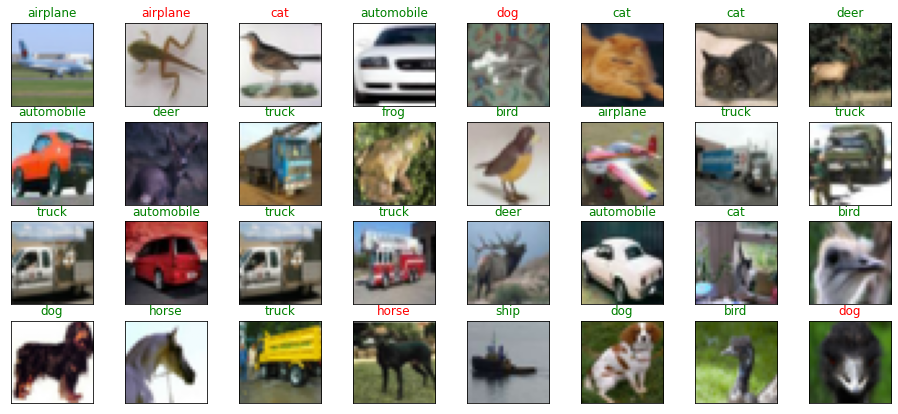

In [34]:
#Visualizing the Results
fig = plt.figure(figsize=(16,7))
x = np.random.choice(X_test.shape[0],size=32)
for i,im in enumerate(x):
  pl = fig.add_subplot(4,8,1+i,xticks=[], yticks=[])
  pl.imshow(X_test[im,:,:,:])
  _pred = model.predict(X_test[im:im+1,:,:,:])
  pred = labels[np.argmax(_pred)]
  pl.set_title(pred,color= 'green' if pred==labels[np.argmax(y_test[im])] else 'red')

# **Using Data Augmentation**

In [0]:
#In this case we need to specify the Validation Data
(X_train, X_valid) = X_train[5000:], X_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]


In [0]:
from keras.preprocessing.image import ImageDataGenerator
augen = ImageDataGenerator(
    rotation_range=75,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip = True,
)

In [0]:
#Fit Image Data Generator on our Training dat
augen.fit(X_train)

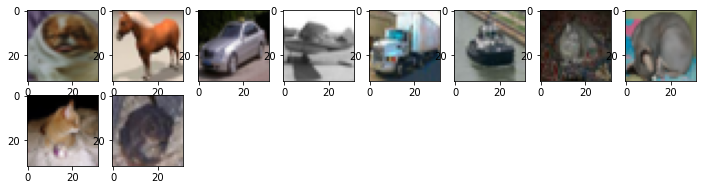

In [38]:
#Visualize some results
X_train_subset=X_train[100:110,:,:,:]
fig1 = plt.figure(figsize=(12,6))
for i in range(0,len(X_train_subset)):
    ax = fig1.add_subplot(4,8,i+1)
    ax.imshow(X_train_subset[i])

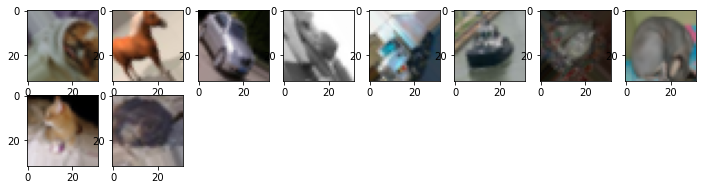

In [39]:
#Augmented Images
fig2 = plt.figure(figsize=(12,6))
for batch in augen.flow(x=X_train_subset,batch_size=10,shuffle=False):
  for i in range(0,batch.shape[0]):
    ax = fig2.add_subplot(4,8,i+1)
    ax.imshow(batch[i])
  break #We only want to observe one batch of Augmented Images


In [0]:
#Define the model
model = Sequential()
model.add(Conv2D(32,(3,3),padding='same',activation='relu',kernel_regularizer=regularizers.l2(0.001),input_shape=(32,32,3)))
model.add(BatchNormalization())
model.add(Conv2D(32,(3,3),padding='same',activation='relu',kernel_regularizer=regularizers.l2(0.001)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(64,(3,3),padding='same',activation='relu',kernel_regularizer=regularizers.l2(0.001)))
model.add(BatchNormalization())
model.add(Conv2D(64,(3,3),padding='same',activation='relu',kernel_regularizer=regularizers.l2(0.001)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(128,(3,3),padding='same',activation ='relu',kernel_regularizer=regularizers.l2(0.001)))
model.add(BatchNormalization())
model.add(Conv2D(128,(3,3),padding='same',activation='relu',kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(1024,activation='relu',kernel_regularizer=regularizers.l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.6))
model.add(Dense(100,activation='relu',kernel_regularizer=regularizers.l2(0.005)))
model.add(BatchNormalization())
model.add(Dense(10,activation='softmax'))

model.summary()


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_19 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_20 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 16, 16, 64)       

In [0]:
model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics = ['accuracy'])

In [0]:
model.load_weights('cifar10.models.best.hdf5')
from keras.callbacks import ModelCheckpoint
chkp = ModelCheckpoint('cifar10.models.best.hdf5',verbose=1,save_best_only=True)


In [0]:
batch_size = 64
epochs = 200

model.fit_generator(augen.flow(X_train,y_train,batch_size=batch_size),steps_per_epoch=X_train.shape[0]//batch_size,
                    epochs=epochs,verbose=1,callbacks=[chkp],validation_data=(X_valid,y_valid))

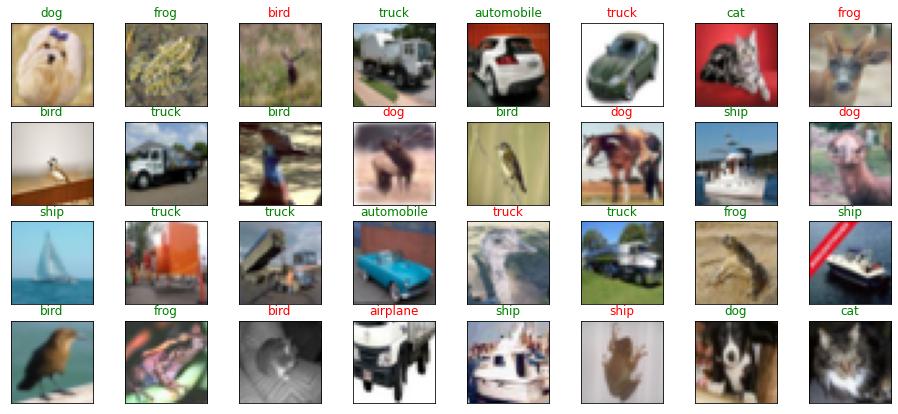

In [42]:
#Visualizing the Results
fig = plt.figure(figsize=(16,7))
x = np.random.choice(X_test.shape[0],size=32)
for i,im in enumerate(x):
  pl = fig.add_subplot(4,8,1+i,xticks=[], yticks=[])
  pl.imshow(X_test[im,:,:,:])
  _pred = model.predict(X_test[im:im+1,:,:,:])
  pred = labels[np.argmax(_pred)]
  pl.set_title(pred,color= 'green' if pred==labels[np.argmax(y_test[im])] else 'red')

As you can see that using Augmentation did not give any boost to the model performance. Without Augmentation, our model achieved about ``83%``[only for 150 epochs] accuracy. And even after using transfer learning, Augmentation did not yield any good results.

